<a href="https://colab.research.google.com/github/srilav/machinelearning/blob/main/WOE_Credit_risk_modelling_Logistic_Regression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://bigml.com/user/jbosca/gallery/dataset/5a7def3d2a83476e09000456#info) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted. 

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

## Grading = 10 Points

### Download the dataset

In [ ]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Import Neccesary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #To ignore the warnings

In [ ]:
#to make notebook run stable across runs
np.random.seed(45)
#multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
def pd_set_df_view_options(max_rows=1000, max_columns=350, display_width=320):
    # Show more than 10 or 20 rows when a dataframe comes back.
    pd.set_option('display.max_rows', max_rows)
    # Columns displayed in debug view
    pd.set_option('display.max_columns', max_columns)

    pd.set_option('display.width', display_width)
pd_set_df_view_options()

### Load the dataset

In [ ]:
#Load data
def load_data(Filepath):
  data = pd.read_csv(
    Filepath,      # relative python path to subdirectory
    sep=',',           # Comma-separated value file.
    encoding='utf8',        # encoding
    header=0,                  # specify a row as header
    usecols=[1,2,3,4,5,6,7,8,9,10,11],   # Only load the  columns specified.
    dtype={"age": int,"NumberOfTime30-59DaysPastDueNotWorse":int,"NumberOfOpenCreditLinesAndLoans":int,"NumberOfTimes90DaysLate":int},             # Parse the agecolumn as an integer     
    parse_dates=None,     # Intepret the date column as a date
    skiprows=None,         # Skip the first few rows of the file
    na_values=['.', 'na','NA','NAN','NaN']       # Take any '.' or 'na' values as NA
    )
  return data

Filepath='/content/GiveMeSomeCredit.csv'
df=load_data(Filepath)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Describe the all statistical properties of the train dataset

In [ ]:
#data exploration
def explore_data(df):
    print(f"First 5 rows : \n {df.head()} \n")
    print(f"Shape : \n {df.shape} \n")
    print(f"Columns : \n {df.columns} \n")
    print(f"Data types : \n {df.dtypes}\n")
    print(f"Summary of data : \n {df.describe()} \n")
    print(f"data info :\n{df.info()}\n")
    print(f"Null objects in each column :\n{df.isnull().sum()}\n")
    print(f"Duplicate rows in data :\n{np.any(df.duplicated())}\n")

  
explore_data(df)

First 5 rows : 
    SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  NumberOfDependents
0                 1                              0.766127   45                                     2   0.802982         9120.0                               13                        0                             6                                     0                 2.0
1                 0                              0.957151   40                                     0   0.121876         2600.0                                4                        0                             0                                     0                 1.0
2                 0                              0.658180   38                                     1   0.085113         3042.0                                2     

### Pre-processing (1 point)

In [ ]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
df = df[df['age']>18]   # Legal age for a person to be a borrower 
df=df[df["RevolvingUtilizationOfUnsecuredLines"]<100] # percentage can't be more than 100 
df.shape

(149776, 11)

#### Remove unwanted columns

In [ ]:
def duplicate_drop(df):
  print(f"Duplicate objects in dataframe before :\n{df.duplicated().value_counts()}\n")
  #df.dropna(thresh=len(df)*0.9, axis=1)  #drop columns in which more than 10% of values missing
  df=df.drop_duplicates()
  print(f"Duplicate objects in dataframe after :\n{df.duplicated().value_counts()}\n")
  return df

df=duplicate_drop(df)

Duplicate objects in dataframe before :
False    149167
True        609
dtype: int64

Duplicate objects in dataframe after :
False    149167
dtype: int64



#### Handle the missing data

Find how many null values in the dataset and fill with mean or remove them

In [ ]:
#Handling  missing value by column
def miss_column(df):
  print(f"Missing objects in dataframe before :\n{np.any(df.isna())}\n")
  #df.dropna(thresh=len(df)*0.9, axis=1)  #drop columns in which more than 10% of values missing
  miss_col=list(df.columns[df.isnull().any()])
  print(f"Missing columns in dataframe are :\n{miss_col}\n")  
  for col in miss_col:
    df[col].fillna(df[col].median(),inplace=True)
    #df.dropna(subset=[col],inplace=True) # or use fill 
  print(f"Missing objects in dataframe after :\n{np.any(df.isna())}\n")
  return df

df=miss_column(df)


Missing objects in dataframe before :
True

Missing columns in dataframe are :
['MonthlyIncome', 'NumberOfDependents']

Missing objects in dataframe after :
False



**Note:** Real world plot data to see the data behaviour and then decide on strategy. Read about impact of skewness of distribution on  mean and median 

In [ ]:
df["NumberOfDependents"]=df["NumberOfDependents"].astype('int') #only after handling missing value 
df.shape

(149167, 11)

### EDA &  Visualization ( 1 point)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f213f46b850>,
      dtype=object)

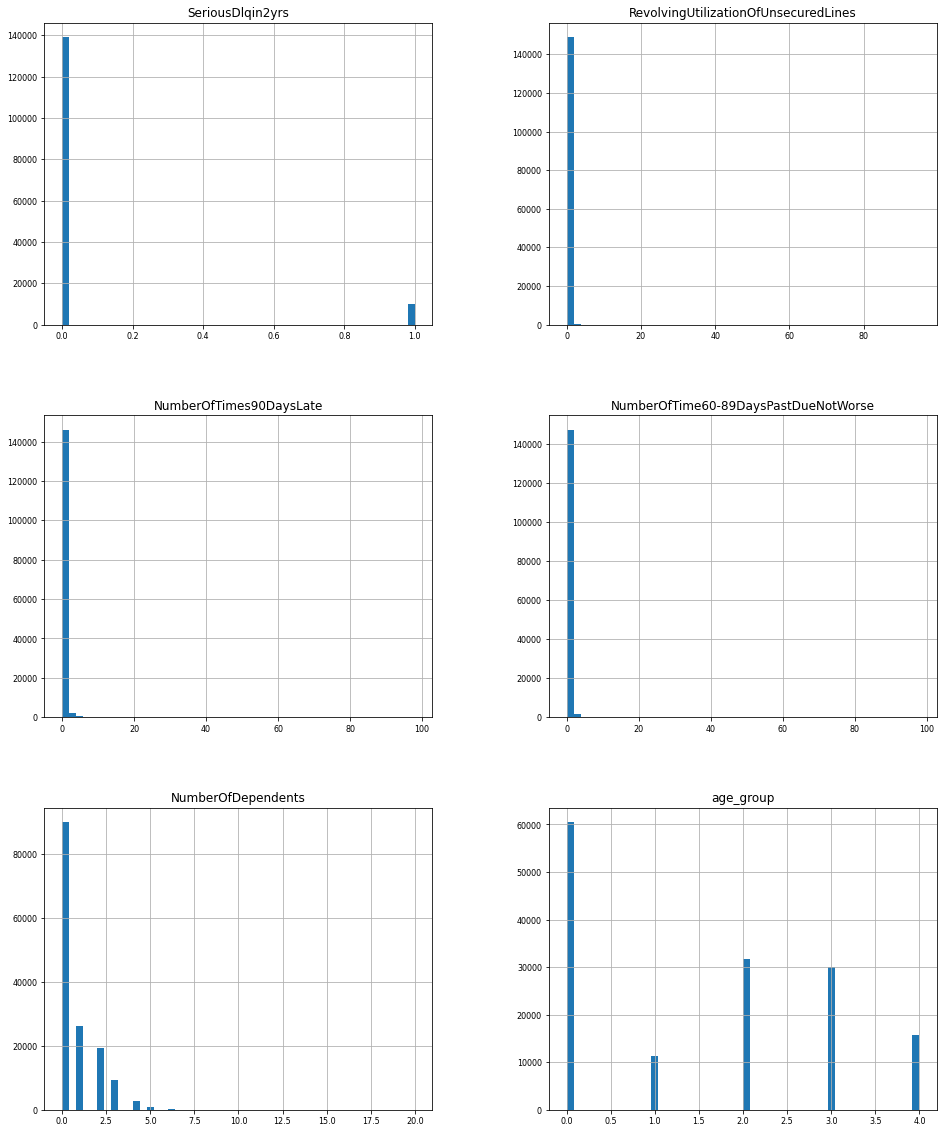

In [ ]:
numeric_cols = list(df.select_dtypes(['float64','int']).columns)
df[numeric_cols].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

#### Calculate the percentage of the target lebels and visualize with a graph

Percentage of the target labels :
0    93.297445
1     6.702555
Name: SeriousDlqin2yrs, dtype: float64



<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Target Label')

Text(0, 0.5, 'Count ')

Text(0.5, 1.0, 'Imbalance Plotting')

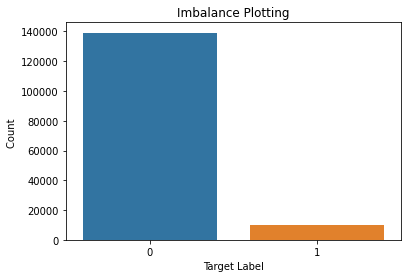

In [ ]:
print(f"Percentage of the target labels :\n{(df.SeriousDlqin2yrs.value_counts() / len(df) ) * 100}\n")
# Target count plot
plt.figure()
sns.countplot('SeriousDlqin2yrs',data=df)
plt.xlabel("Target Label")
plt.ylabel("Count ")
plt.title("Imbalance Plotting")
plt.show()

([<matplotlib.patches.Wedge at 0x7f213ccf9710>,
 [Text(-1.075703828057672, 0.22991579828726566, 'REPAYER (TARGET=0)'),
  Text(1.124599462231932, -0.24036649006808258, 'DEFAULTER (TARGET=1)')],
 [Text(-0.586747542576912, 0.12540861724759944, '93%'),
  Text(0.6356431743050049, -0.13585932047326407, '7%')])

Text(0.5, 1.0, 'TARGET Variable - DEFAULTER Vs REPAYER')

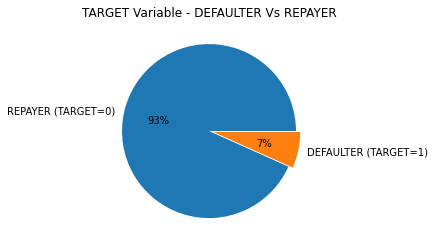

In [ ]:
plt.pie(df['SeriousDlqin2yrs'].value_counts(normalize=True)*100,labels=['REPAYER (TARGET=0)','DEFAULTER (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs REPAYER')
plt.show()

**Inference:** 
 In credit scoring,Target has a binary value of either 1 or 0. A value of 1 means that the borrower is delinquent and has defaulted on his loans for the last 2 years, while a value of 0 means that the borrower is a good customer and repays his debts on time for the last two years.i.e Person experienced 90 days past due delinquency or worse (Type: Y/N).
 
  Very few i.e approx 7% of borrowers experienced financial distress

#### Plot the distribution of SeriousDlqin2yrs by age

In [ ]:
df['MonthlyIncome'].quantile([0,0.2,0.3,0.7,0.92,1])

0.00          0.0
0.20       3400.0
0.30       4333.0
0.70       6640.0
0.92      11666.0
1.00    3008750.0
Name: MonthlyIncome, dtype: float64

In [ ]:
#binning income

In [ ]:
df['age'].quantile([0,0.2,0.3,0.7,0.92,1])

0.00     21.0
0.20     39.0
0.30     44.0
0.70     61.0
0.92     74.0
1.00    109.0
Name: age, dtype: float64

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Target  ')

Text(0.5, 1.0, 'Distribution of Target by age group')

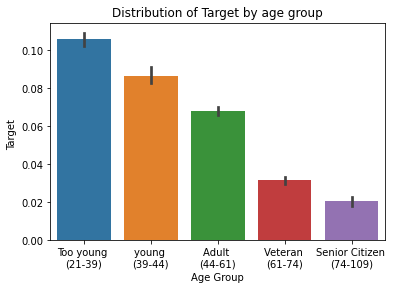

In [ ]:
#Binning of Borrowers Age into Age group
bin_labels=['Too young \n(21-39)','young \n(39-44)','Adult \n(44-61)','Veteran \n(61-74)','Senior Citizen \n(74-109)']
df['age_group']=pd.qcut(df['age'],
                         q=[0,0.2,0.3,0.7,0.92,1],
                         labels=bin_labels)
# Target v/s age group plot
plt.figure()
sns.barplot(x='age_group',y='SeriousDlqin2yrs',data=df)
plt.xlabel("Age Group")
plt.ylabel("Target  ")
plt.title("Distribution of Target by age group")
plt.show()

In [ ]:
#dropping age column and label encoding age_group column
df.drop(['age'],axis=1) 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cat = df["age_group"]
df["age_group"] = encoder.fit_transform(df_cat)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group
0,1,0.766127,2,0.802982,9120.0,13,0,6,0,2,Adult \n(44-61)
1,0,0.957151,0,0.121876,2600.0,4,0,0,0,1,young \n(39-44)
2,0,0.658180,1,0.085113,3042.0,2,1,0,0,0,Too young \n(21-39)
3,0,0.233810,0,0.036050,3300.0,5,0,0,0,0,Too young \n(21-39)
4,0,0.907239,1,0.024926,63588.0,7,0,1,0,0,Adult \n(44-61)
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,0,0.225131,2100.0,4,0,1,0,0,Veteran \n(61-74)
149996,0,0.299745,0,0.716562,5584.0,4,0,1,0,2,young \n(39-44)
149997,0,0.246044,0,3870.000000,5400.0,18,0,1,0,0,Adult \n(44-61)
149998,0,0.000000,0,0.000000,5716.0,4,0,0,0,0,Too young \n(21-39)


#### Calculate the correlation and plot the heatmap

Highly correlated columns ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']


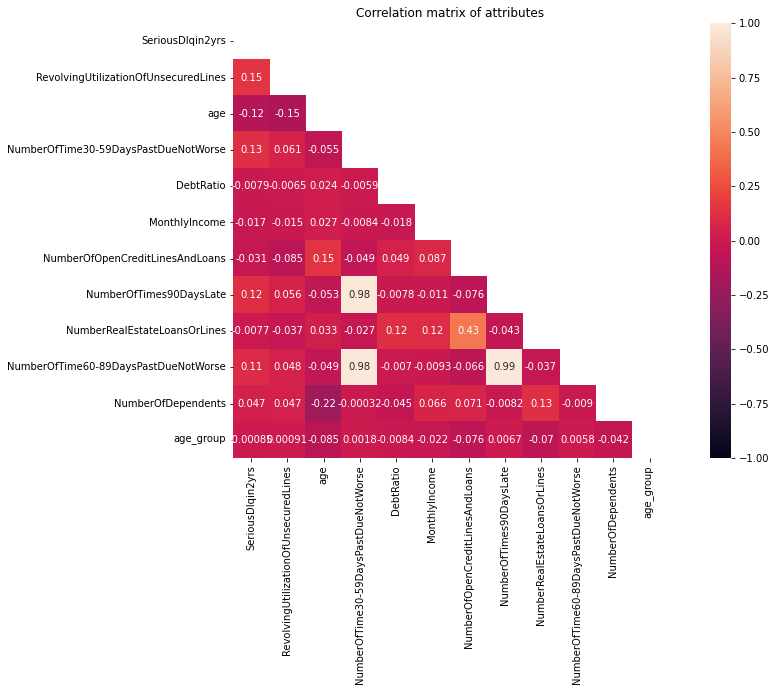

In [ ]:
# YOUR CODE HERE
def Correlation(df, bar=0.9):
  # Creates correlation matrix
  Corr = df.corr()
  # Set Up Mask To Hide Upper Triangle
  mask = np.triu(np.ones_like(Corr, dtype=bool))
  tri_df = Corr.mask(mask)
  # Finding features with correlation value more than specified threshold value (bar=0.9)
  highly_cor_col = [col for col in tri_df.columns if any(tri_df[col] > bar )]
  print("Highly correlated columns",highly_cor_col)
  #Heat map for correlation matrix of attributes
  fig,ax=plt.subplots(figsize=(15,8))
  sns.heatmap(Corr,mask=mask,vmax=1.00,vmin=-1.00,square=True,annot=True,ax=ax)
  ax.set_title('Correlation matrix of attributes')
  plt.show()

  # Drop the highly correlated columns
  #reduced_df = df.drop(highly_cor_col, axis = 1)
  #print("shape of total data",df.shape,"shape of reduced data",reduced_df.shape)
  return df
  
df=Correlation(df)

### Data Engineering (2 points)

In [ ]:
features = df.iloc[:, 1:]
labels = df.iloc[:, 0]
labels.value_counts()

0    139169
1      9998
Name: SeriousDlqin2yrs, dtype: int64

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [ ]:
# YOUR CODE HERE
clf = WOE()
clf.fit(features, labels)
#clf.woe_df # weight of evidence transformation dataset. This dataset will be used in making bivariate charts as well. 
clf.iv_df #information value dataset


WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
    mono_custom_binning={'DebtRatio': array([0.0000000e+00, 2.4010132e-01, 5.7252133e-01, 3.2966400e+05]),
                         'MonthlyIncome': array([      0.,    4679.,    6176., 3008750.]),
                         'NumberOfDependents': array([ 0.,  1., 20.]),
                         'NumberOfOpenCreditLinesAndLoans': array([ 0.,  6., 10., 58.]),
                         'NumberOfTime30-59DaysPastDueNotWo...
                                                       Interval(0.377, 95.0, closed='right'): 0.9180835576760321},
              'age': {Interval(20.999, 45.0, closed='right'): 0.41548866197131173,
                      Interval(45.0, 59.0, closed='right'): 0.041944834917882236,
                      Interval(59.0, 109.0, closed='right'): -0.8022540097044343},
              'age_group': {0: 0.014985033673204919, 1: -1.2396240996014194,
                            2: 0.4991675085506473, 3: -0.7941694

,Variable_Name,Information_Value
8,RevolvingUtilizationOfUnsecuredLines,0.938911
6,NumberOfTimes90DaysLate,0.484693
4,NumberOfTime30-59DaysPastDueNotWorse,0.470383
5,NumberOfTime60-89DaysPastDueNotWorse,0.265204
10,age_group,0.235526
9,age,0.219148
1,MonthlyIncome,0.062309
3,NumberOfOpenCreditLinesAndLoans,0.024575
2,NumberOfDependents,0.023445
0,DebtRatio,0.011900


### Identify features,  target and split it into train and test

In [ ]:
#drop_columns = ['NumberRealEstateLoansOrLines', 'DebtRatio', 'NumberOfDependents', 'NumberOfOpenCreditLinesAndLoans', 'MonthlyIncome', 'age', 'NumberOfTime30-59DaysPastDueNotWorse']
drop_columns = ['NumberRealEstateLoansOrLines', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans', 'MonthlyIncome', 'age', 'NumberOfTime30-59DaysPastDueNotWorse']
df = df.drop(drop_columns, axis=1)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group
0,1,0.766127,0,0,2,0
1,0,0.957151,0,0,1,4
2,0,0.658180,1,0,0,2
3,0,0.233810,0,0,0,2
4,0,0.907239,0,0,0,0


In [ ]:
    features = df.iloc[:, 1:]
    labels = df.iloc[:, 0]


In [ ]:
features.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group
0,0.766127,0,0,2,0
1,0.957151,0,0,1,4
2,0.658180,1,0,0,2
3,0.233810,0,0,0,2
4,0.907239,0,0,0,0


In [ ]:
labels.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
# Features and target
def split_data(df, test_sz):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=test_sz)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test =split_data(df,0.30)

In [ ]:
print("X_train:", X_train.shape) # X_train
print("X_test:",X_test.shape) # X_test
print("y_train:",y_train.shape) # y_train
print("y_test:",y_test.shape) # y_test

X_train: (104416, 5)
X_test: (44751, 5)
y_train: (104416,)
y_test: (44751,)


### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](
https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7)

In [ ]:
from scipy.special import expit, logit #expit is the sigmoid fn and logit is the logit fn
epsilon = 1e-7 #to stop overflowing
def cost_function(x, y,theta):
  y = y.to_numpy()
  t = expit(x.dot(theta)) #sigmoid fn
  return -np.average(y * np.log(t+epsilon) + (1-y) * np.log(1-t+epsilon))

In [ ]:
theta = np.linspace(0,1,num=X_train.shape[1])
cost_function(X_train,y_train,theta)

2.2129018351290095

In [ ]:
def gradient_cost_function(x, y, theta):
  y = y.to_numpy()
  t = expit(x.dot(theta))
  return x.T.dot(y-t) / x.shape[0]

In [ ]:
def update_theta(x, y, theta, learning_rate):
  return theta + learning_rate * gradient_cost_function(x, y, theta)

In [ ]:
def descent(x, y, learning_rate, iterations=500, threshold=0.00005):
  theta = np.zeros(x.shape[1])
  costs = []
  for i in range(iterations):
    theta = update_theta(x, y, theta, learning_rate)
    cost = cost_function(x, y, theta)
    costs.append({'cost': cost, 'weights':theta})
    if i >  15 and abs(costs[-2]['cost']-costs[-1]['cost']) < threshold: #stopping condition
      break
  return theta, costs

In [ ]:
Theta, costs = descent(X_train, y_train, learning_rate=0.00001)

In [ ]:
def predict(x, theta):
  return (expit(x.dot(theta)) >= 0.5).astype(int)

In [ ]:
def get_accuracy(x, y, theta):
  y_pred = predict(x, theta)
  return (y_pred == y).sum() / y.shape[0]
print(f'Accuracy on the training set: {get_accuracy(X_train, y_train, Theta)}')
print(f'Accuracy on the test set: {get_accuracy(X_test, y_test, Theta)}')

Accuracy on the training set: 0.9173785626723874
Accuracy on the test set: 0.9175660879086501


In [ ]:
# Visualize the updates of theta
#plt.figure(figsize=(8, 6))
#plt.plot(theta_values, loss_values1, 'x', linestyle='-')
#plt.plot(theta_updates, loss_value, '.', markersize=12)  #costs as nested dict 
#plt.show()

### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.metrics import accuracy_score, \
confusion_matrix,roc_curve, \
roc_auc_score, precision_score, recall_score, precision_recall_curve, \
classification_report

In [ ]:
# With weights inferred from given data
weights = {0:0.07, 1:0.93}

log_reg_with_weights_custom = LogisticRegression(class_weight=weights)
X_test = np.nan_to_num(X_test)
X_train = np.nan_to_num(X_train)

log_reg_with_weights_custom.fit(X_train, y_train)
y_pred_observedw = log_reg_with_weights_custom.predict(X_test)

LogisticRegression(C=1.0, class_weight={0: 0.07, 1: 0.93}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f'Accuracy Score with weights = {accuracy_score(y_test, y_pred_observedw)}')

Accuracy Score with weights = 0.7796920739201358


In [ ]:
# With balanced weightage
log_reg_with_weights_balanced = LogisticRegression(class_weight='balanced')
X_test = np.nan_to_num(X_test)
X_train = np.nan_to_num(X_train)

log_reg_with_weights_balanced.fit(X_train, y_train)
y_pred_balancew = log_reg_with_weights_balanced.predict(X_test)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f'Accuracy Score with weights = {accuracy_score(y_test, y_pred_balancew)}')

Accuracy Score with weights = 0.7748206743983375


In [ ]:
# Without weightage
log_reg = LogisticRegression()
X_test = np.nan_to_num(X_test)
X_train = np.nan_to_num(X_train)
log_reg.fit(X_train, y_train)
y_pred_default = log_reg.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(f'Accuracy Score without weights = {accuracy_score(y_test, y_pred_default)}')

Accuracy Score without weights = 0.9336104221134723


" A credit score is a numerical expression based on a level analysis of a person's credit files, to represent the creditworthiness of an individual. A credit score is primarily based on a credit report, information typically sourced from credit bureaus.Lenders, such as banks and credit card companies, use credit scores to evaluate the potential risk posed by lending money to consumers and to mitigate losses due to bad debt. Lenders use credit scores to determine who qualifies for a loan, at what interest rate, and what credit limits. Lenders also use credit scores to determine which customers are likely to bring in the most revenue. The use of credit or identity scoring prior to authorizing access or granting credit is an implementation of a trusted system.Credit scoring is not limited to banks. Other organizations, such as mobile phone companies, insurance companies, landlords, and government departments employ the same techniques. Digital finance companies such as online lenders also use alternative data sources to calculate the creditworthiness of borrowers

### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor(B), Offset(A) — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [ ]:
beta = clf.iv_df["Information_Value"].values
def credit_score(x,beta,coefficients,intercept):
  return -np.sum(coefficients*beta)*factor-(intercept*factor-offset)*(x.shape[1]+1)/2 #credit scoring

In [ ]:
credit_score(X_train,beta,coefficients=Theta.values[0:11],intercept=Theta.values[11]) #score for descent assisted logistic regression

### Performance Metrics (1 point)

#### Precision

In [ ]:
# Precision for various LR
print(f'Precision score for custom weight implementation : {precision_score(y_test,y_pred_observedw)} \n')
print(f'Precision score for balanced weight implementation : {precision_score(y_test,y_pred_balancew)} \n')
print(f'Precision score for default implementation : {precision_score(y_test,y_pred_default)} \n')

Precision score for custom weight implementation : 0.1877614111656665 

Precision score for balanced weight implementation : 0.18603208366569174 

Precision score for default implementation : 0.5475113122171946 



#### Recall

In [ ]:
# Recall for various LR
print(f'Recall score for custom weight implementation : {recall_score(y_test,y_pred_observedw)} \n')
print(f'Recall score for balanced weight implementation : {recall_score(y_test,y_pred_balancew)} \n')
print(f'Recall score for default implementation : {recall_score(y_test,y_pred_default)} \n')

Recall score for custom weight implementation : 0.6901737967914439 

Recall score for balanced weight implementation : 0.7015374331550802 

Recall score for default implementation : 0.04044117647058824 



#### Classification Report

In [ ]:
# Classification Report for various LR
print(f'Classification Report for custom weight implementation : \n {classification_report(y_test,y_pred_observedw,labels=[0, 1])} \n')
print(f'Classification Report for balanced weight implementation : \n{classification_report(y_test,y_pred_balancew,labels=[0, 1])} \n')
print(f'Classification Report for default implementation : \n {classification_report(y_test,y_pred_default,labels=[0, 1])} \n')

Classification Report for custom weight implementation : 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     41759
           1       0.19      0.69      0.30      2992

    accuracy                           0.78     44751
   macro avg       0.58      0.74      0.58     44751
weighted avg       0.92      0.78      0.83     44751
 

Classification Report for balanced weight implementation : 
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     41759
           1       0.19      0.70      0.29      2992

    accuracy                           0.77     44751
   macro avg       0.58      0.74      0.58     44751
weighted avg       0.92      0.77      0.83     44751
 

Classification Report for default implementation : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     41759
           1       0.55      0.04      0.08      2992

    ac

#### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# Confustion Matrix for various LR
print(f'Confustion Matrixt for custom weight implementation : \n {confusion_matrix(y_test,y_pred_observedw,labels=[0, 1])} \n')
print(f'Confustion Matrix for balanced weight implementation : \n{confusion_matrix(y_test,y_pred_balancew,labels=[0, 1])} \n')
print(f'Confustion Matrix for default implementation : \n {confusion_matrix(y_test,y_pred_default,labels=[0, 1])} \n')

Confustion Matrixt for custom weight implementation : 
 [[32826  8933]
 [  927  2065]] 

Confustion Matrix for balanced weight implementation : 
[[32575  9184]
 [  893  2099]] 

Confustion Matrix for default implementation : 
 [[41659   100]
 [ 2871   121]] 



### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations

In [ ]:
# Validation of model
print("confusion_matrix = \n", confusion_matrix(y_true=y_test, y_pred=y_pred))

print("*accuracy_train = %.3f" % accuracy_score(y_true=y_train, y_pred=y_pred_train))
print("accuracy = %.3f" % accuracy_score(y_true=y_test, y_pred=y_pred))

print("*precision_train = %.3f" % precision_score(y_true=y_train, y_pred=y_pred_train))
print("precision = %.3f" % precision_score(y_true=y_test, y_pred=y_pred))

print("*recall_train = %.3f" % recall_score(y_true=y_train, y_pred=y_pred_train))
print("recall = %.3f" % recall_score(y_true=y_test, y_pred=y_pred))

print("*f1_score_train = %.3f" % f1_score(y_true=y_train, y_pred=y_pred_train))
print("f1_score = %.3f" % f1_score(y_true=y_test, y_pred=y_pred))

In [ ]:
#roc_curve
import scikitplot as skplt
vali_proba_df = pd.DataFrame(lr.predict_proba(X_test))
skplt.metrics.plot_roc(y_test, vali_proba_df,
                      plot_micro=False,figsize=(6,6),
                      plot_macro=False)